<a href="https://colab.research.google.com/github/somanshbudhwar/EmbodiedAi/blob/main/Particl_Swarm_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BONUS -  Particle Swarm Optimization
import numpy as np

# Eggholder function to test swarm's performance
def f2(F):
    x = F[:,0]
    y = F[:,1]
    return -(y + 47)*np.sin(np.sqrt(abs(x/2 + y + 47))) - x*np.sin(np.sqrt(abs(x - y - 47 )))

x1 = np.linspace(-600., 600., 900)
x2 = np.linspace(-600., 600., 900)

In [2]:
import random
import pandas as pd
from matplotlib import pyplot as plt
import copy

#PSO: New position = old_position + C1*current_velocity_of_particle + C2*personal_best_location + C3*best_location_found_by_swarm

# WEIGHTS for velocity, personal_best & team_best
C1 = 0.4
C2 = 0.5
C3 = 0.9

POPULATION = 100 # Swarm default population
CONSENSUS = 0.8 # Percentage Consensus needed to decide final position of swarm
DECAY = 0.4 # Decay factor of velocity for each particle
CONSENSUS_RANGE = 3


class Particle:
    def __init__(self, func):
        self.func = func
        self.previous_position = Particle.initial_position() # Choosing random position
        self.position = self.previous_position + random.uniform(-2,2)
        self.velocity = Particle.initial_position() # Choosing random velocity
        self.team_best = Particle.initial_position()
        self.best = self.position if self.func(self.position) < self.func(self.previous_position) \
                                    else self.previous_position
        

    def current_velocity(self):
        self.velocity = DECAY*(self.position - self.previous_position)

    def personal_best(self):
        return copy.copy(self.position) if self.func(self.position) < self.func(self.best)\
                                        else copy.copy(self.best)

    def initial_position():
        x = random.choice(x1)
        y = random.choice(x2)

        return np.asarray([[x, y]])

    def new_position(self):
        # Updating position of partile
        self.previous_position = copy.copy(self.position)
        
        vel = C1*random.random()*self.velocity
        goal = C2*random.random()*(self.team_best - self.position)
        step = C3*random.random()*(self.best - self.position)
        self.position += ( vel + goal + step)
        
        # Updating velocity and personal best of particle
        self.current_velocity() 
        self.best = self.personal_best()

    def get_vel(self):
        return copy.copy(self.velocity)
    
    def get_pos(self):
        return copy.copy(self.position)
        

class Swarm:
    
    def __init__(self, F, N=POPULATION):
        self.population = N
        self.particles = {i:Particle(F) for i in range(N)}
        self.best_position = self.best()
        for particle in self.particles.values():
            particle.team_best = self.best_position
    
    def get_data(self, index):
        df = {}
        df['particle_name'] = str(index)
        df['velocity'] = self.particles[index].get_vel()
        df['position'] = self.particles[index].get_pos()
        
        return df
        
        
    def best(self):

        random_particle = random.choice(list(self.particles.items()))
        min_f = random_particle[1].func(random_particle[1].best)
        particle_index = random_particle[0]

        for index, particle in self.particles.items():
            if particle.func(particle.best) < min_f:
                min_f = particle.func(particle.best)
                particle_index = index
        
        self.best_position = copy.copy(self.particles[particle_index].best)
        for particle in self.particles.values():
            particle.team_best = copy.copy(self.best_position)
        
        return copy.copy(self.particles[particle_index].best)
        
            
        
    def run_sim(self):
        consensus_counter = 0
        required_consensus = self.population*CONSENSUS


        for particle1 in self.particles.values():
            for particle2 in self.particles.values():
                if (abs(particle1.position - particle2.position) < \
                    np.array([[CONSENSUS_RANGE,CONSENSUS_RANGE]])).all():
                    consensus_counter += 1
            if consensus_counter > required_consensus:
                return True
            consensus_counter = 0

        self.best()
        for particle in self.particles.values():
            particle.new_position()
        return False

# Plotting positions of particles
def make_plot(particles):
    x = []
    y = []

    for particle in particles.particles.values():
        x.append(particle.position[0][0])
        y.append(particle.position[0][1])
        
    return x,y

   



In [3]:
# PLEASE DO NOT REMOVE!
# The objective function.
def f(x):
    return x[:,0]**2 + 2*x[:,1]**2 -0.3*np.cos(3.*np.pi*x[:,0])-0.4*np.cos(4.*np.pi*x[:,1])+0.7

# PLEASE DO NOT REMOVE!
# Calculating the objective for visualization.
def calculate_f(x1, x2):
  f_x = []
  for i in range(len(x1)):
    for j in range(len(x2)):
      f_x.append(f2(np.asarray([[x1[i], x2[j]]])))


  return np.asarray(f_x).reshape(len(x1), len(x2))

# PLEASE DO NOT REMOVE!
# Define coordinates
x1 = np.linspace(-600., 600., 400)
x2 = np.linspace(-600., 600., 400)

# Calculate the objective
f_x = calculate_f(x1, x2).reshape(len(x1), len(x2))



[-894.40261296]
[[-464.47758421  385.43225532]]


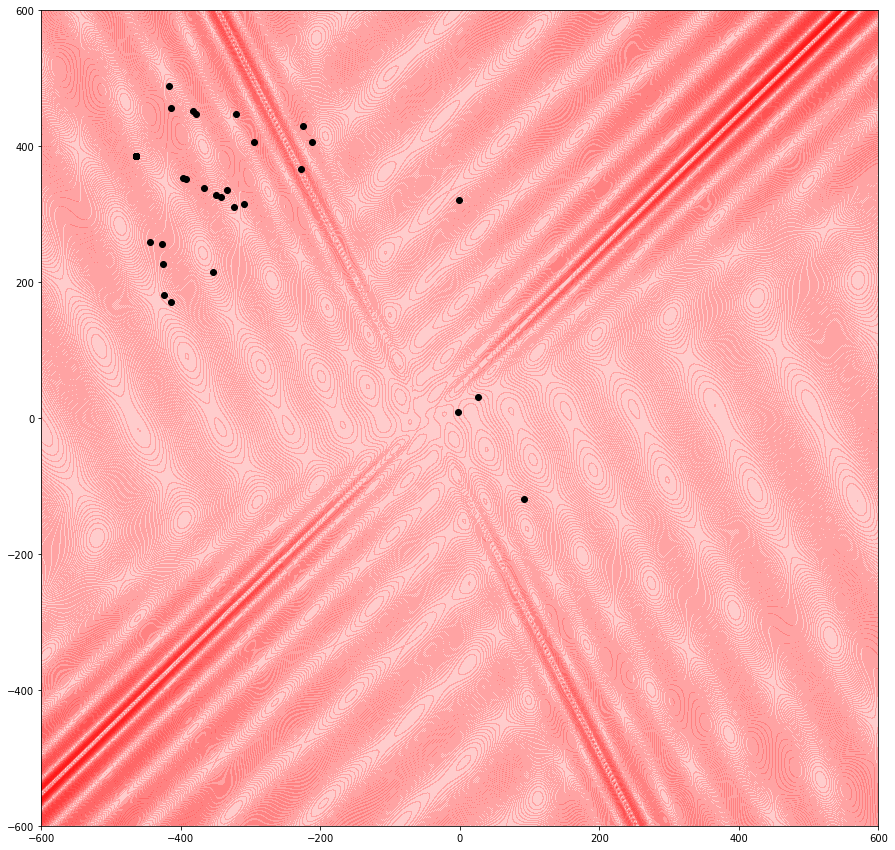

In [4]:
import matplotlib.animation as animation

particles = Swarm(f2,50)
fig, ax  =plt.subplots(figsize=(15,15))


frames = 100
def update(i):
    ax.clear()
    if particles.run_sim():
        pass
    x,y = make_plot(particles)
    ax.set_xlim([-600,600])
    ax.set_ylim([-600,600])

    ax.contourf(x1, x2, f_x, 100, colors = 'red', alpha=0.2)

    ax.scatter(x,y, c='black')

ani = animation.FuncAnimation(fig, update, frames=frames, interval=500)
ani.save('clear.gif', writer='pillow')

print(f2(particles.best_position))
print(particles.best_position)